In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [39]:
file_path = "C:\\Users\\Asus\\Desktop\\FİNALÖDEVİ\\VeriSeti.csv"
df = pd.read_csv(file_path)

In [40]:
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_missing_values] = df[columns_with_missing_values].replace(0, np.nan)

In [41]:
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df[columns_with_missing_values].median())


In [42]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[120  31]
 [ 27  53]]


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

In [48]:
performance_metrics = {
    'Accuracy': accuracy,
    'Recall (Sensitivity)': recall,
    'Precision': precision,
    'Specificity': specificity,
    'AUC': roc_auc
}

for metric, value in performance_metrics.items():
    print(f"{metric}: {value:.2f}")

Accuracy: 0.75
Recall (Sensitivity): 0.66
Precision: 0.63
Specificity: 0.79
AUC: 0.80


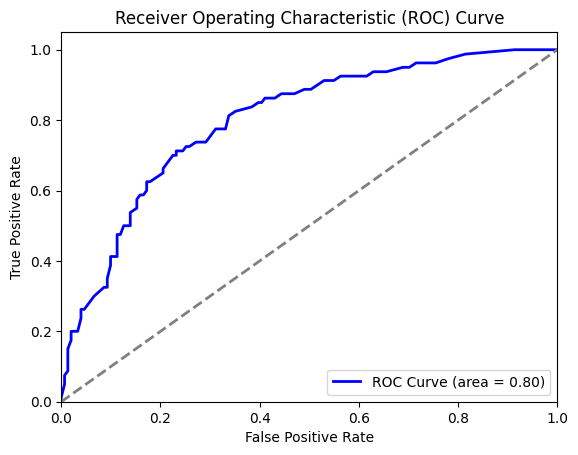

In [49]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()